In [1]:
# Direct lammps script implemetation in pyiron 
from tempfile import tempdir
from pyiron import Project
import numpy as np
import pandas
from jinja2 import Template
import matplotlib.pyplot as plt 
import scipy.constants as sc
from scipy.integrate import cumtrapz
import os
from pyiron import ase_to_pyiron, pyiron_to_ase
from ase.io import read, write
import warnings
warnings.filterwarnings("ignore")

In [2]:
pr = Project("/nfshome/deshmukh/pyiron/projects/NASICON/project/padone_pot/von_alpen")

In [3]:
# bulding x=2.4 nasicon
en = []
c = []
for i in range(1,50,1):
    job = pr['nasi_2_4_pedone_%s'%i]
    en_1 = job['output/generic/energy_tot'][-1]
    en.append(en_1)
    c.append(i)
    


In [4]:
en_v = []
c_v = []
for i in range(1,50,1):
    job = pr['nasi_2_4_pedone_von_alpen_%s'%i]
    en = job['output/generic/energy_tot'][-1]
    en_v.append(en) 
    c_v.append(i)   

In [5]:
en_c = []
c_c = []
for i in range(1,50,1):
    job = pr['clearfield_nasi_zr_1_65_%s'%i]
    en = job['output/generic/energy_tot'][-1]
    en_c.append(en) 
    c_c.append(i)   

In [6]:
en_y = []
c_y = []
for i in range(1,50,1):
    job = pr['yde_nasi_zr_1_7_%s'%i]
    en = job['output/generic/energy_tot'][-1]
    en_y.append(en) 
    c_y.append(i)  

In [7]:
en_b = []
c_b = []
for i in range(1,50,1):
    try:
        job = pr['baur_nasi_zr_1_9_%s'%i]
        en = job['output/generic/energy_tot'][-1]
        en_b.append(en) 
        c_b.append(i)
    except: 
        pass

In [55]:
en_k = []
c_k = []
for i in range(1,50,1):
    try:
        job = pr['kagg_nasi_zr_1_3_%s'%i]
        en = job['output/generic/energy_tot'][-1]
        en_k.append(en) 
        c_k.append(i)
    except: 
        pass

In [8]:
en_b_v = []
c_b_v = []

for i in range(1,50,1):
    try:
        job = pr['bohnka_nasi_zr_1_9_%s'%i]
        en = job['output/generic/energy_tot'][-1]
        en_b_v.append(en) 
        c_b_v.append(i)
    except:
        pass

In [9]:
# traversa
en_t = []
c_t = []

for i in range(1,50,1):
    try:
        job = pr['traversa_nasi_zr_1_3_%s'%i]
        en = job['output/generic/energy_tot'][-1]
        en_t.append(en) 
        c_t.append(i)
    except:
        pass

In [31]:
# esshoumi 
en_e = []
c_e = []

for i in range(1,50,1):
    try:
        job = pr['esshaoumi_nasi_zr_1_8_%s'%i]
        en = job['output/generic/energy_tot'][-1]

        en_e.append(en) 
        c_e.append(i)
    except:
        pass

In [11]:
import matplotlib.pylab as plt

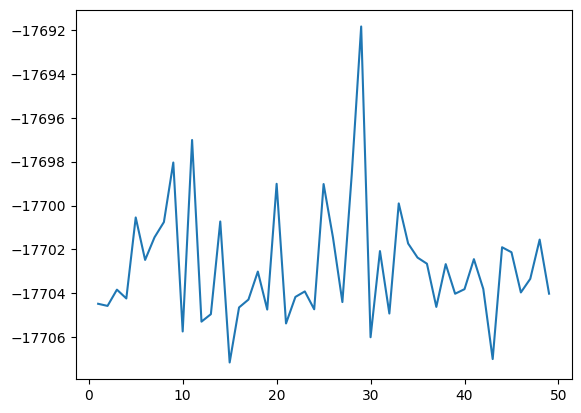

In [20]:
plt.plot(c_v,en_v, label = 'Von Alpen')


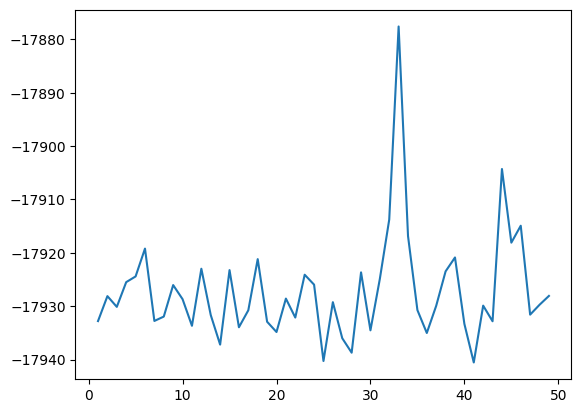

In [21]:

plt.plot(c_c,en_c, label = 'Clearfield')


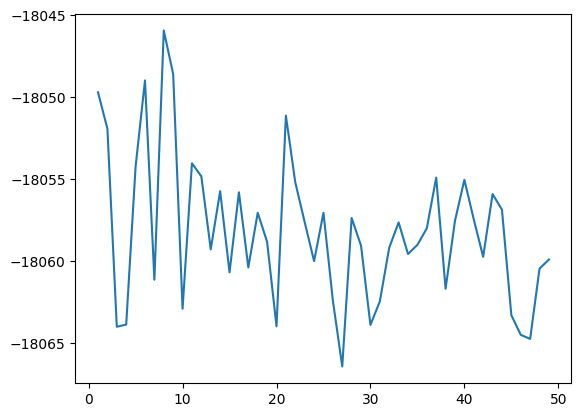

In [22]:
plt.plot(c_y,en_y, label = 'Yde')


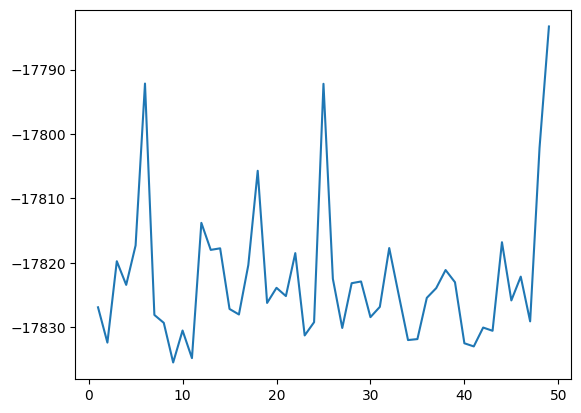

In [23]:
plt.plot(c_b,en_b, label = 'Baur')


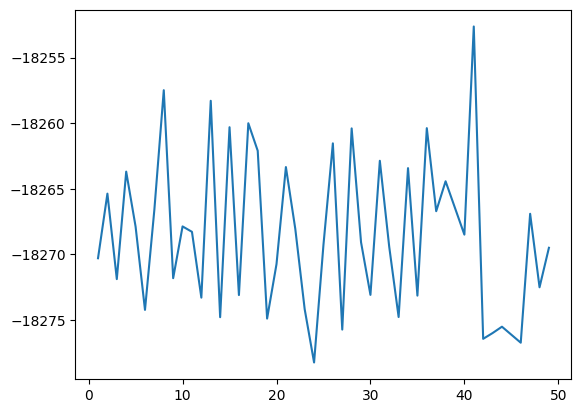

In [24]:
plt.plot(c_b_v,en_b_v, label = 'Bohnka')


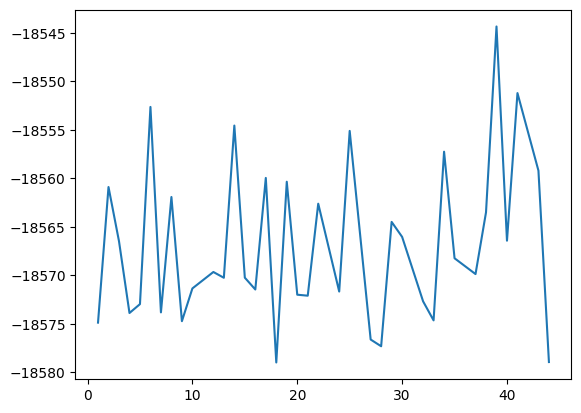

In [25]:
plt.plot(c_t,en_t, label = 'Traversa')


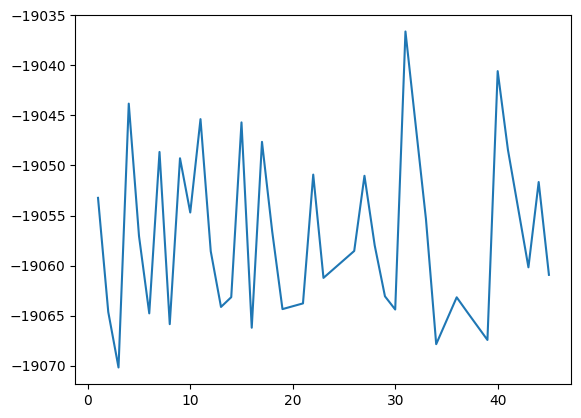

In [32]:
plt.plot(c_e,en_e, label = 'Esshoumi')


In [56]:
von_al = [x for x in en_v-np.min(en_v)]
clear = [x for x in en_c-np.min(en_c)]
yde = [x for x in en_y-np.min(en_y)]
baur = [x for x in en_b-np.min(en_b)]
kagg = [x for x in en_k-np.min(en_k)]
bohnka = [x for x in en_b_v-np.min(en_b_v)]
traversa = [x for x in en_t-np.min(en_t)]
esshoumi = [x for x in en_e-np.min(en_e)]


In [39]:
for i, j in zip(range(len(von_al)), von_al):
    print(i+1, j)

1 2.673263582699292
2 2.5761985965982603
3 3.3166684468014864
4 2.9154162371014536
5 6.604015323198837
6 4.671215451500757
7 5.699509468900942
8 6.394081119000475
9 9.106971450899437
10 1.4117903174992534
11 10.132442810099747
12 1.8598335087008309
13 2.1992802573004155
14 6.421167010797944
15 0.0
16 2.5062997224995343
17 2.86477673059926
18 4.139992733500549
19 2.4113188628980424
20 8.137278116500966
21 1.776830096001504
22 2.985966969597939
23 3.236246205298812
24 2.422358785301185
25 8.126102147100028
26 5.687900251497922
27 2.7516544241989322
28 8.58029557339978
29 15.30237083529937
30 1.149589180600742
31 5.073152728899004
32 2.229031191498507
33 7.243664750698372
34 5.417776671798492
35 4.7770115591010835
36 4.49813375119993
37 2.530693058801262
38 4.479138594000688
39 3.130394643299951
40 3.338659189099417
41 4.705525784098427
42 3.3475359086005483
43 0.15574067499983357
44 5.247736044901103
45 5.020135912898695
46 3.1895824544008065
47 3.809765143698314
48 5.5972524811004405
49

In [40]:
for i, j in zip(range(len(clear)), clear):
    print(i+1, j)

1 7.7574651201030065
2 12.433372015500936
3 10.42133431970069
4 15.055407476702385
5 16.12298405220281
6 21.342107950302307
7 7.782487461001438
8 8.599761162600771
9 14.506536027300172
10 11.864135800100485
11 6.873952921203454
12 17.571120715001598
13 8.890034025400382
14 3.3472354879013437
15 17.309487978800462
16 6.600424713902612
17 9.786673277103546
18 19.36358565340197
19 7.636086004502431
20 5.708993697800906
21 11.974004309202428
22 8.4195999554031
23 16.445121116001246
24 14.58440069540302
25 0.27647017810159014
26 11.302794748800807
27 4.541817533201538
28 1.8331027510030253
29 16.885070868502225
30 6.020802649502002
31 15.658884952201333
32 26.780289490601717
33 62.96621700540345
34 23.69779740330341
35 9.816090601900214
36 5.525957921501686
37 10.622052919603448
38 17.075238091700157
39 19.680389352302882
40 7.230291506402864
41 0.0
42 10.654021559003013
43 7.723641712400422
44 36.256581732901395
45 22.45502145050341
46 25.62807390640228
47 8.964488962803443
48 10.813284477

In [43]:
job_clear = pr['clearfield_nasi_zr_1_65_41']
str_clear = job_clear.get_structure().write('clearfield_41.cif')

In [44]:
for i, j in zip(range(len(yde)), yde):
    print(i+1, j)
    
    

1 16.707986809098657
2 14.487409407800442
3 2.4204034517970285
4 2.5538618826976744
5 12.179514455699973
6 17.4359972197999
7 5.28925199150035
8 20.477093477999006
9 17.821961509598623
10 3.5185946958990826
11 12.383465572696878
12 11.583688219299802
13 7.139567080699635
14 10.684060075698653
15 5.7354545919988595
16 10.614544402797037
17 6.037879861898546
18 9.367055099799472
19 7.595983650997368
20 2.44761844779714
21 15.287137263498153
22 11.219244509098644
23 8.79531590789702
24 6.420080546897225
25 9.36671539730014
26 4.015988131199265
27 0.0
28 9.047721215800266
29 7.360972487498657
30 2.5343545067989908
31 3.9658572925000044
32 7.241309717497643
33 8.780855952998536
34 6.855777117900288
35 7.411386834897712
36 8.420066667200444
37 11.510360897897044
38 4.738974768297339
39 8.88390057919969
40 11.377415600098175
41 8.963952333797351
42 6.682328697297635
43 10.507735383198451
44 9.559093084997585
45 3.1237479950978013
46 1.9300166922002973
47 1.678249033899192
48 5.964858428898879

In [45]:
job_yde = pr['yde_nasi_zr_1_7_27']
str_yde = job_yde.get_structure().write('yde_27.cif')

In [46]:
for i, j in zip(range(len(baur)), baur):
    print(i+1, j)
    

1 8.562698446199647
2 3.0825961574992107
3 15.712733467502403
4 12.043281455502438
5 18.160193818301195
6 43.28492734580141
7 7.376252369700524
8 6.1518998616993485
9 0.0
10 4.959023443101614
11 0.6732003393990453
12 21.668533072199352
13 17.471651546202338
14 17.714623615102028
15 8.304582787899562
16 7.448180476199923
17 15.126947942801053
18 29.74844113130166
19 9.241215890200692
20 11.585981923399231
21 10.305574463200173
22 16.96848115370085
23 4.197383567701763
24 6.2507807692018105
25 43.245498593001685
26 12.981725259502127
27 5.353742328199587
28 12.301822190402163
29 12.569620587699319
30 7.035119720301736
31 8.63054506860135
32 17.760494373600523
33 10.568580375700549
34 3.4799921838020964
35 3.6298370133008575
36 10.028230983400135
37 11.5356398447002
38 14.345472587399854
39 12.450655187101802
40 2.980902722101746
41 2.4912866328995733
42 5.42004233750049
43 4.917091264400369
44 18.659892230600235
45 9.629285264902137
46 13.32227675499962
47 6.3808972605002054
48 33.306088

In [47]:
job_baur = pr['baur_nasi_zr_1_9_9']
str_baur = job_baur.get_structure().write('baur_9.cif')

In [57]:
for i, j in zip(range(len(kagg)), kagg):
    print(i+1, j)
    

1 25.42364956090023
2 4.981854956698953
3 7.502106497198838
4 8.97245023009964
5 0.0
6 15.570790730198496
7 20.272876788800204
8 21.119972568398225
9 18.86474758519762
10 13.576232912797423
11 24.93027715249991
12 25.79176904169799
13 11.575044299999718
14 5.913145827496919
15 20.433536640899547
16 23.95860530380014
17 11.323168736998923
18 39.89266404409864
19 9.144738421797229
20 14.28111854639792
21 20.774988614299218
22 16.06460052249895
23 39.95946145219932
24 19.388866406399757
25 21.991581720198155
26 16.957112103296822
27 17.899594620299467
28 12.692788618998748
29 28.92686355079786
30 24.791239110298193
31 14.220709837300092
32 15.267977347699343


In [58]:
job_kagg = pr['kagg_nasi_zr_1_3_5']
str_kagg = job_kagg.get_structure().write('kagg_5.cif')

In [49]:
job_bohnka = pr['bohnka_nasi_zr_1_9_24']
str_bohnka = job_bohnka.get_structure().write('bohnka_24.cif')

In [50]:
for i, j in zip(range(len(traversa)), traversa):
    print(i+1, j)

1 4.107529906399577
2 18.08397230240007
3 12.501734850698995
4 5.099105708399293
5 6.0144612176009105
6 26.340220898899133
7 5.163593993500399
8 17.05666812579875
9 4.256076123398088
10 7.632276873900992
11 9.327336662299786
12 8.73091038920029
13 24.42034085169871
14 8.740962851697986
15 7.523095122698578
16 19.021857722800632
17 0.0
18 18.63070762139978
19 6.985951238999405
20 6.883870851299434
21 16.367602418999013
22 7.314051121098601
23 23.868918956399284
24 2.3655638124982943
25 1.6716268716008926
26 14.489506312998856
27 12.945031100698543
28 6.302732803298568
29 4.339603995998914
30 21.72625071030052
31 10.741328479398362
32 9.112678218400106
33 15.474208839699713
34 34.63315850559957
35 12.55349775599825
36 27.766509056600626
37 19.773374656400847
38 0.044191749300807714


In [51]:
job_traversa = pr['traversa_nasi_zr_1_3_17']
str_traversa = job_traversa.get_structure().write('traversa_17.cif')


In [52]:
for i, j in zip(range(len(esshoumi)), esshoumi):
    print(i+1, j)

1 16.95105367749784
2 5.544119548099843
3 0.0
4 26.367316331397888
5 13.126460169700295
6 5.406632711099519
7 21.537757240599603
8 4.327741160599544
9 20.905689230497956
10 15.48852294649987
11 24.818218880500353
12 11.617737527198187
13 6.04951765649821
14 7.026407548899442
15 24.49237423899831
16 3.9718179808005516
17 22.54672563009808
18 13.570930690701061
19 5.833430451399181
20 6.403615540701139
21 19.27420804709982
22 8.952050959298504
23 11.64374016779766
24 19.15593187540071
25 12.196196794298885
26 7.112526476998028
27 5.793173937898246
28 33.57731592659911
29 14.831955262499832
30 2.3298071729004732
31 7.012131073101045
32 5.575699156699557
33 2.750943193499552
34 29.615074146298866
35 21.753581704298995
36 10.009332659297797
37 18.532230747299764
38 9.256987854998442


In [53]:
job_esshoumi = pr['esshaoumi_nasi_zr_1_8_3']
str_esshoumi = job_esshoumi.get_structure().write('esshoumi_3.cif')

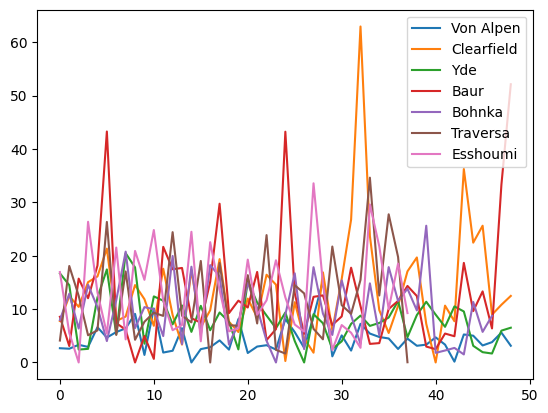

In [37]:
plt.plot(von_al, label = 'Von Alpen')
plt.plot(clear, label = 'Clearfield')
plt.plot(yde, label = 'Yde')
plt.plot(baur, label = 'Baur')
plt.plot(bohnka, label = 'Bohnka')
plt.plot(traversa, label = 'Traversa')
plt.plot(esshoumi, label = 'Esshoumi')
plt.legend()
plt.show()
